## First-order implied volatility expansion for the VIX option under the forward variance framework

### 1. General exponential forward variance model

In the general class of the exponential forward variance model, the VIX option price can be approximated using the following formula
\begin{align*}
\mathbb{E} \left[ \varphi \left(\mathrm{VIX}_T^2\right) \right] = \mathbb{E} \left[ \varphi \left(\mathrm{VIX}_{T,P}^2\right) \right] + \sum_{i=1}^3 \gamma_i \mathcal{G}_i^\varphi \left(\mathrm{VIX}_{T,P}^2\right) + \mathcal{E}_\varphi,
\end{align*}
where $\mathcal{E}_\varphi$ is an error term and the cofficients $(\gamma_i)_{i=\{1,2,3\}}$ are deterministic depending on the kernel defined in the instantaneous forward variance process. This formula can be re-expressed using the Black-Scholes price function and its derivatives with respect to the log-spot price. The rewritten formula for the VIX call, put and futures are given as follow
1. VIX call option
\begin{align*}
c_{\mathrm{VIX}_T}
&:= C^{\text{BS}} \left(\frac{\mu_P}{2} + \frac{\sigma_P^2}{8}, k, \frac{1}{2} \widetilde{\sigma}\right) + \frac{\gamma_1}{2} \partial_x C^{\text{BS}} \left(\frac{\mu_P}{2} + \frac{\sigma_P^2}{8}, k, \frac{1}{2} \widetilde{\sigma}\right) \nonumber\\
&\quad+ \frac{\gamma_2}{4} \partial_x^2 C^{\text{BS}} \left(\frac{\mu_P}{2} + \frac{\sigma_P^2}{8}, k, \frac{1}{2} \widetilde{\sigma}\right) + \frac{\gamma_3}{8} \partial_x^3 C^{\text{BS}} \left(\frac{\mu_P}{2} + \frac{\sigma_P^2}{8}, k, \frac{1}{2} \widetilde{\sigma}\right).
\end{align*}
2. VIX put option
\begin{align*}
p_{\mathrm{VIX}_T}
&:= P^{\text{BS}} \left(\frac{\mu_P}{2} + \frac{\sigma_P^2}{8}, k, \frac{1}{2} \widetilde{\sigma}\right) + \frac{\gamma_1}{2} \partial_x P^{\text{BS}} \left(\frac{\mu_P}{2} + \frac{\sigma_P^2}{8}, k, \frac{1}{2} \widetilde{\sigma}\right) \nonumber\\
&\quad+ \frac{\gamma_2}{4} \partial_x^2 P^{\text{BS}} \left(\frac{\mu_P}{2} + \frac{\sigma_P^2}{8}, k, \frac{1}{2} \widetilde{\sigma}\right) + \frac{\gamma_3}{8} \partial_x^3 P^{\text{BS}} \left(\frac{\mu_P}{2} + \frac{\sigma_P^2}{8}, k, \frac{1}{2} \widetilde{\sigma}\right)
\end{align*}
3. VIX futures
\begin{align*}
F_{\mathrm{VIX}_T} := \mathrm{e}^{\frac{\mu_P}{2} + \frac{\sigma_P^2}{8}} + \frac{\gamma_1}{2} \mathrm{e}^{\frac{\mu_P}{2} + \frac{\sigma_P^2}{8}} + \frac{\gamma_2}{4} \mathrm{e}^{\frac{\mu_P}{2} + \frac{\sigma_P^2}{8}} + \frac{\gamma_3}{8} \mathrm{e}^{\frac{\mu_P}{2} + \frac{\sigma_P^2}{8}}.
\end{align*}
Thus, we approximate the implied volaitlity of the VIX option by
\begin{align*}
\bar{\sigma}_I = \frac{1}{2} \widetilde{\sigma} + \frac{\gamma_2}{2 \widetilde{\sigma} T} + \frac{3 \gamma_3}{8 \widetilde{\sigma} T} - \frac{\gamma_3}{\widetilde{\sigma}^3 T^2} m,
\end{align*}
where $m$ is the log-moneyness defined as $m := \frac{\mu_P}{2} + \frac{\sigma_P^2}{8} - k $.

In [1]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

In [ ]:
import numpy as np
import pandas as pd
import utils
from standard_bergomi import StandardBergomi
from rough_bergomi import RoughBergomi
import seaborn as sns

sns.set_theme("talk")
COLORS = ["blue", "green", "red"]
seed = 777

maturities = {
    "1M": 1.0 / 12.0,
    "3M": 3.0 / 12.0,
    "6M": 6.0 / 12.0
}

In [ ]:
params_b = {
    "omega":2,
    "k":0.5,
    "xi0": 0.235**2
}


params_rb = {
    "eta": 1,
    "H": 0.1,
    "xi0": 0.235**2
}

n_time = 80
n_space = 80

n_disc = 300
n_mc = 10**6

b = StandardBergomi(**params_b)
rb = RoughBergomi(**params_rb)

##### VIX implied volatility wrt the log-moneyness $k = \log (\kappa/ F)$ in the standard Bergomi model

In [17]:
iv_atm_1m = b.implied_vol_proxy(k=0, T=1/12)
iv_atm_3m = b.implied_vol_proxy(k=0, T=3/12)
print(iv_atm_1m, iv_atm_3m)

[0.95937729] [0.92123032]


Since the ATM implied volatility are different for different maturity, we consider ploting the result of the VIX implied volaitlities with respect to the log-moneyness instead of the moneyness.

In [5]:
k = np.linspace(-0.1, 0.4, 10)

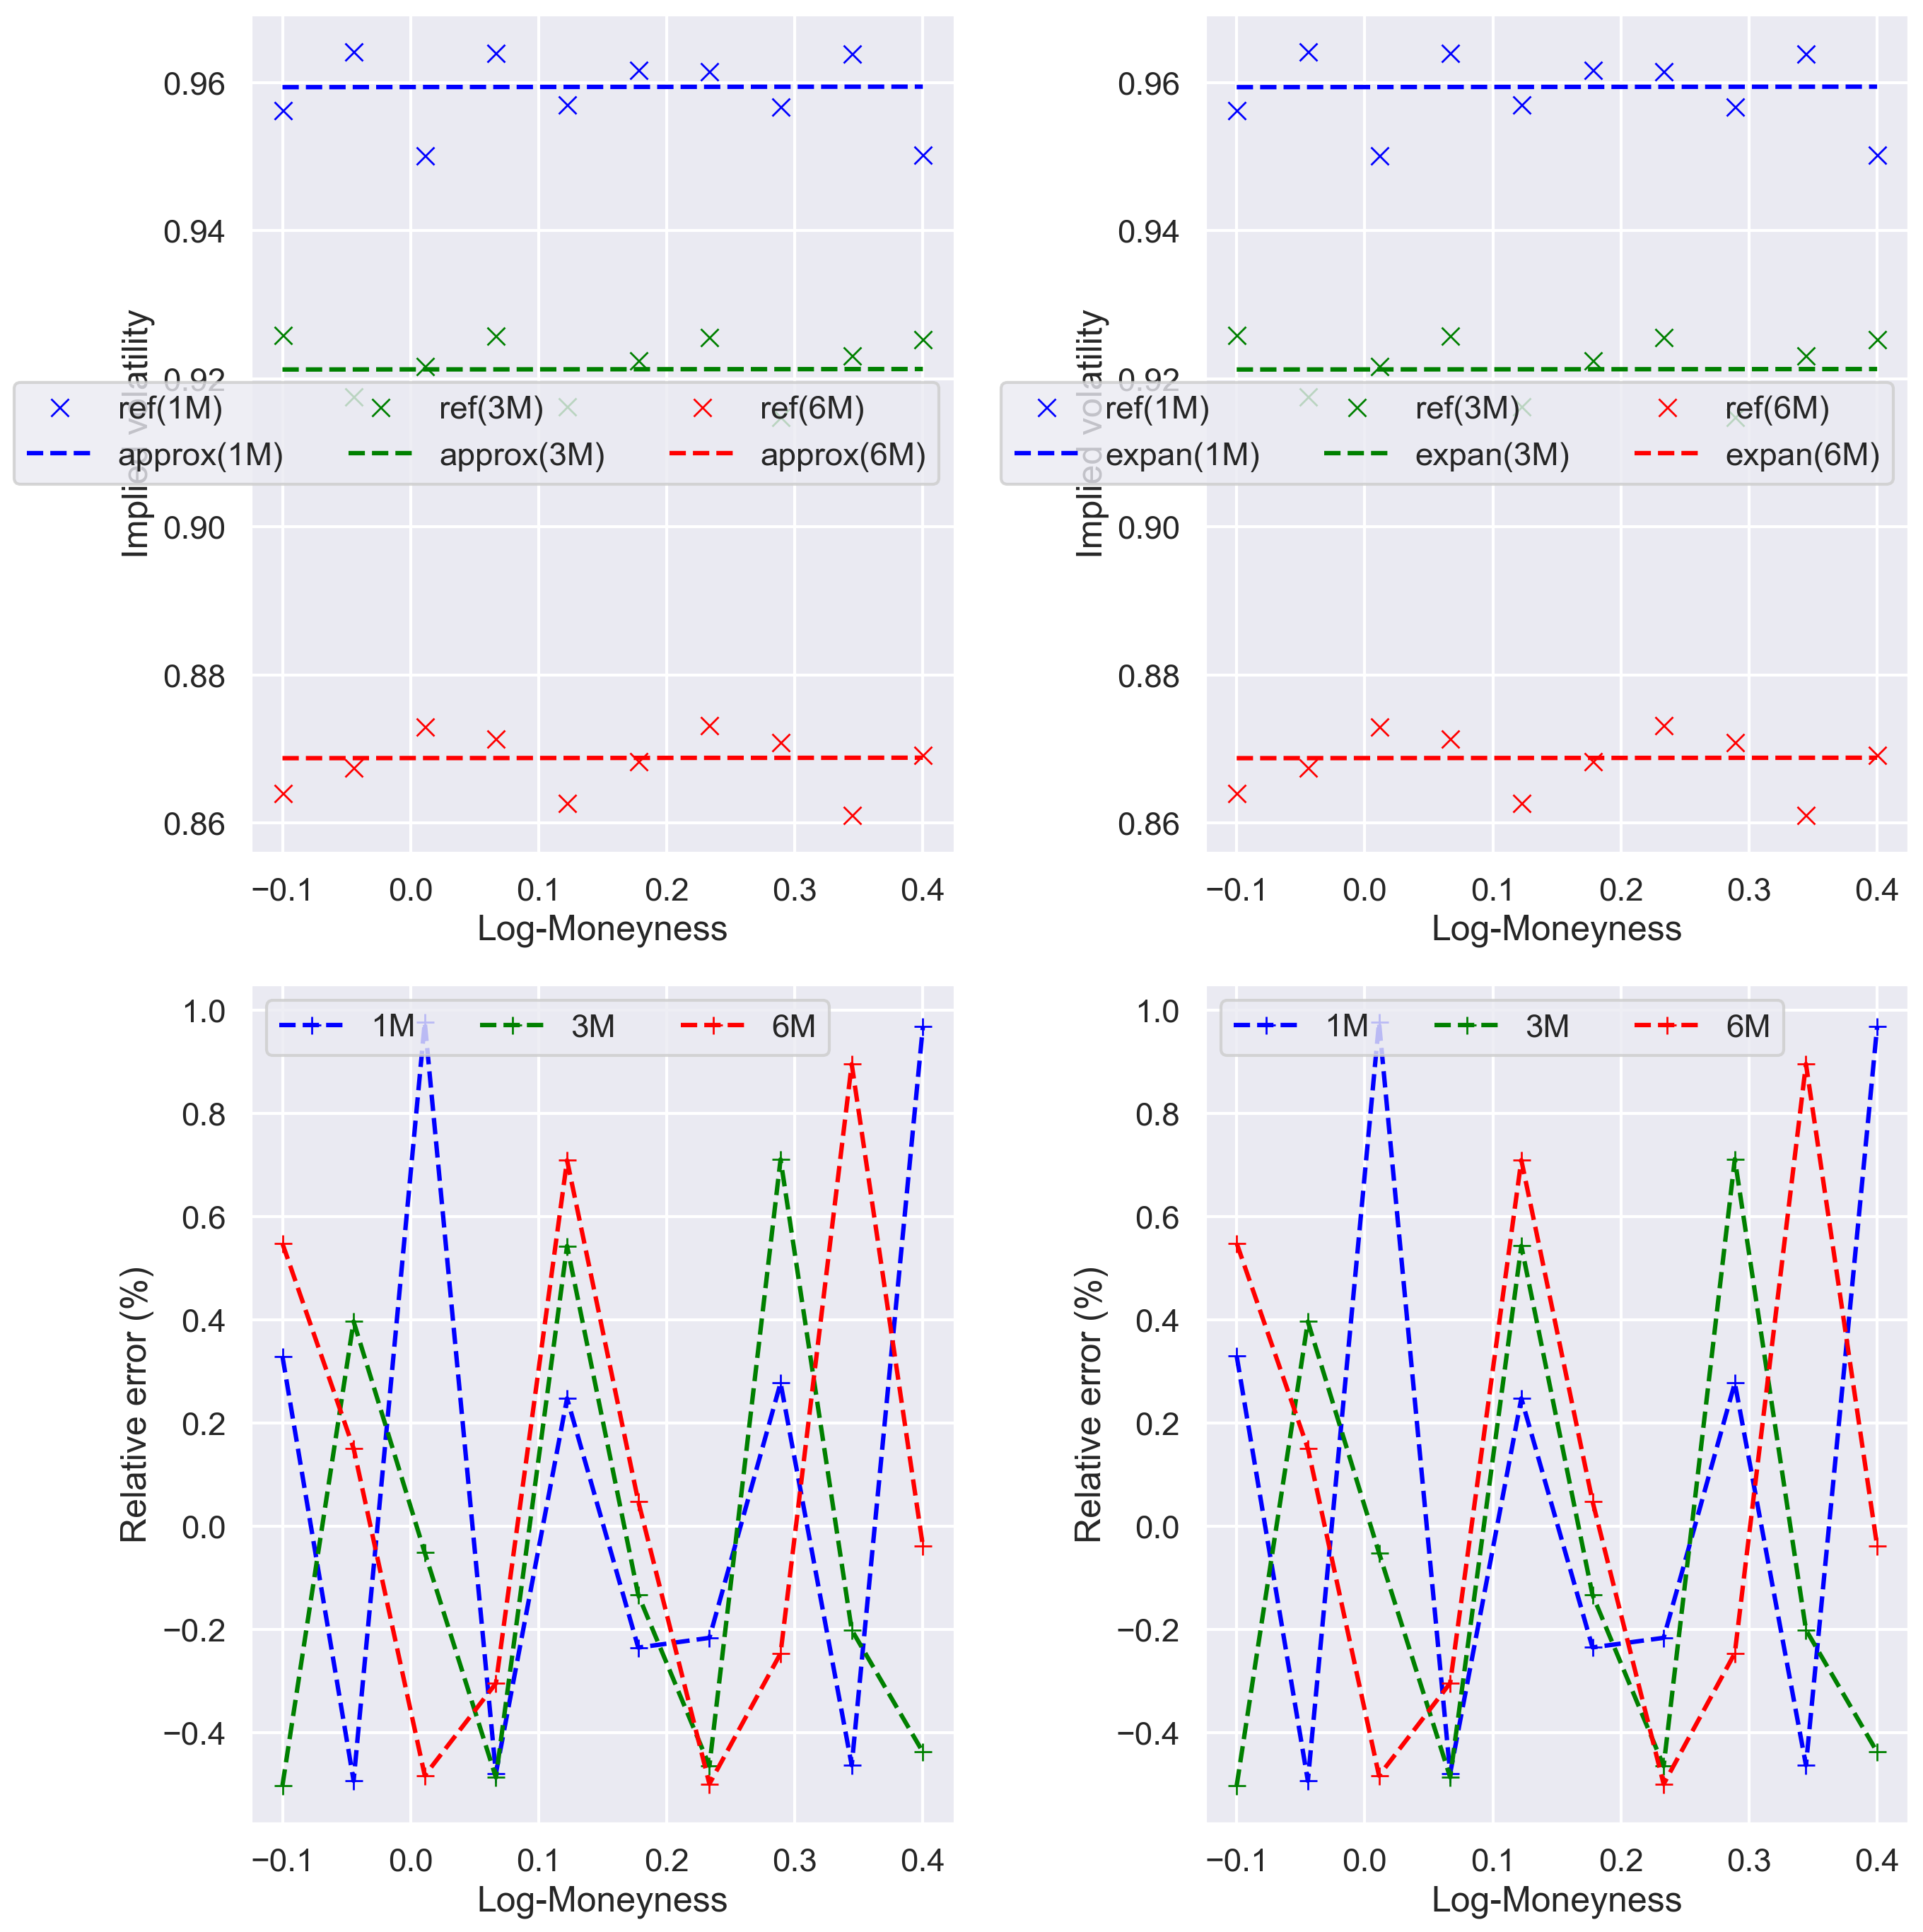

In [ ]:
iv_ref = {
    maturity: b.vix_implied_vol(k, T, n_space, n_time) for maturity, T in maturities.items()
}

iv_proxy = {
    maturity: b.implied_vol_proxy(k, T) for maturity, T in maturities.items()
}

iv_expan = {
    maturity: b.implied_vol_expan(k, T) for maturity, T in maturities.items()
}

utils.plot_style_4(k, maturities, iv_ref, iv_proxy, iv_expan, "Log-Moneyness", "Implied volatility")

#### VIX implied volatility wrt the log-moneyness $k = \log (\kappa/ F)$ in the rough Bergomi model

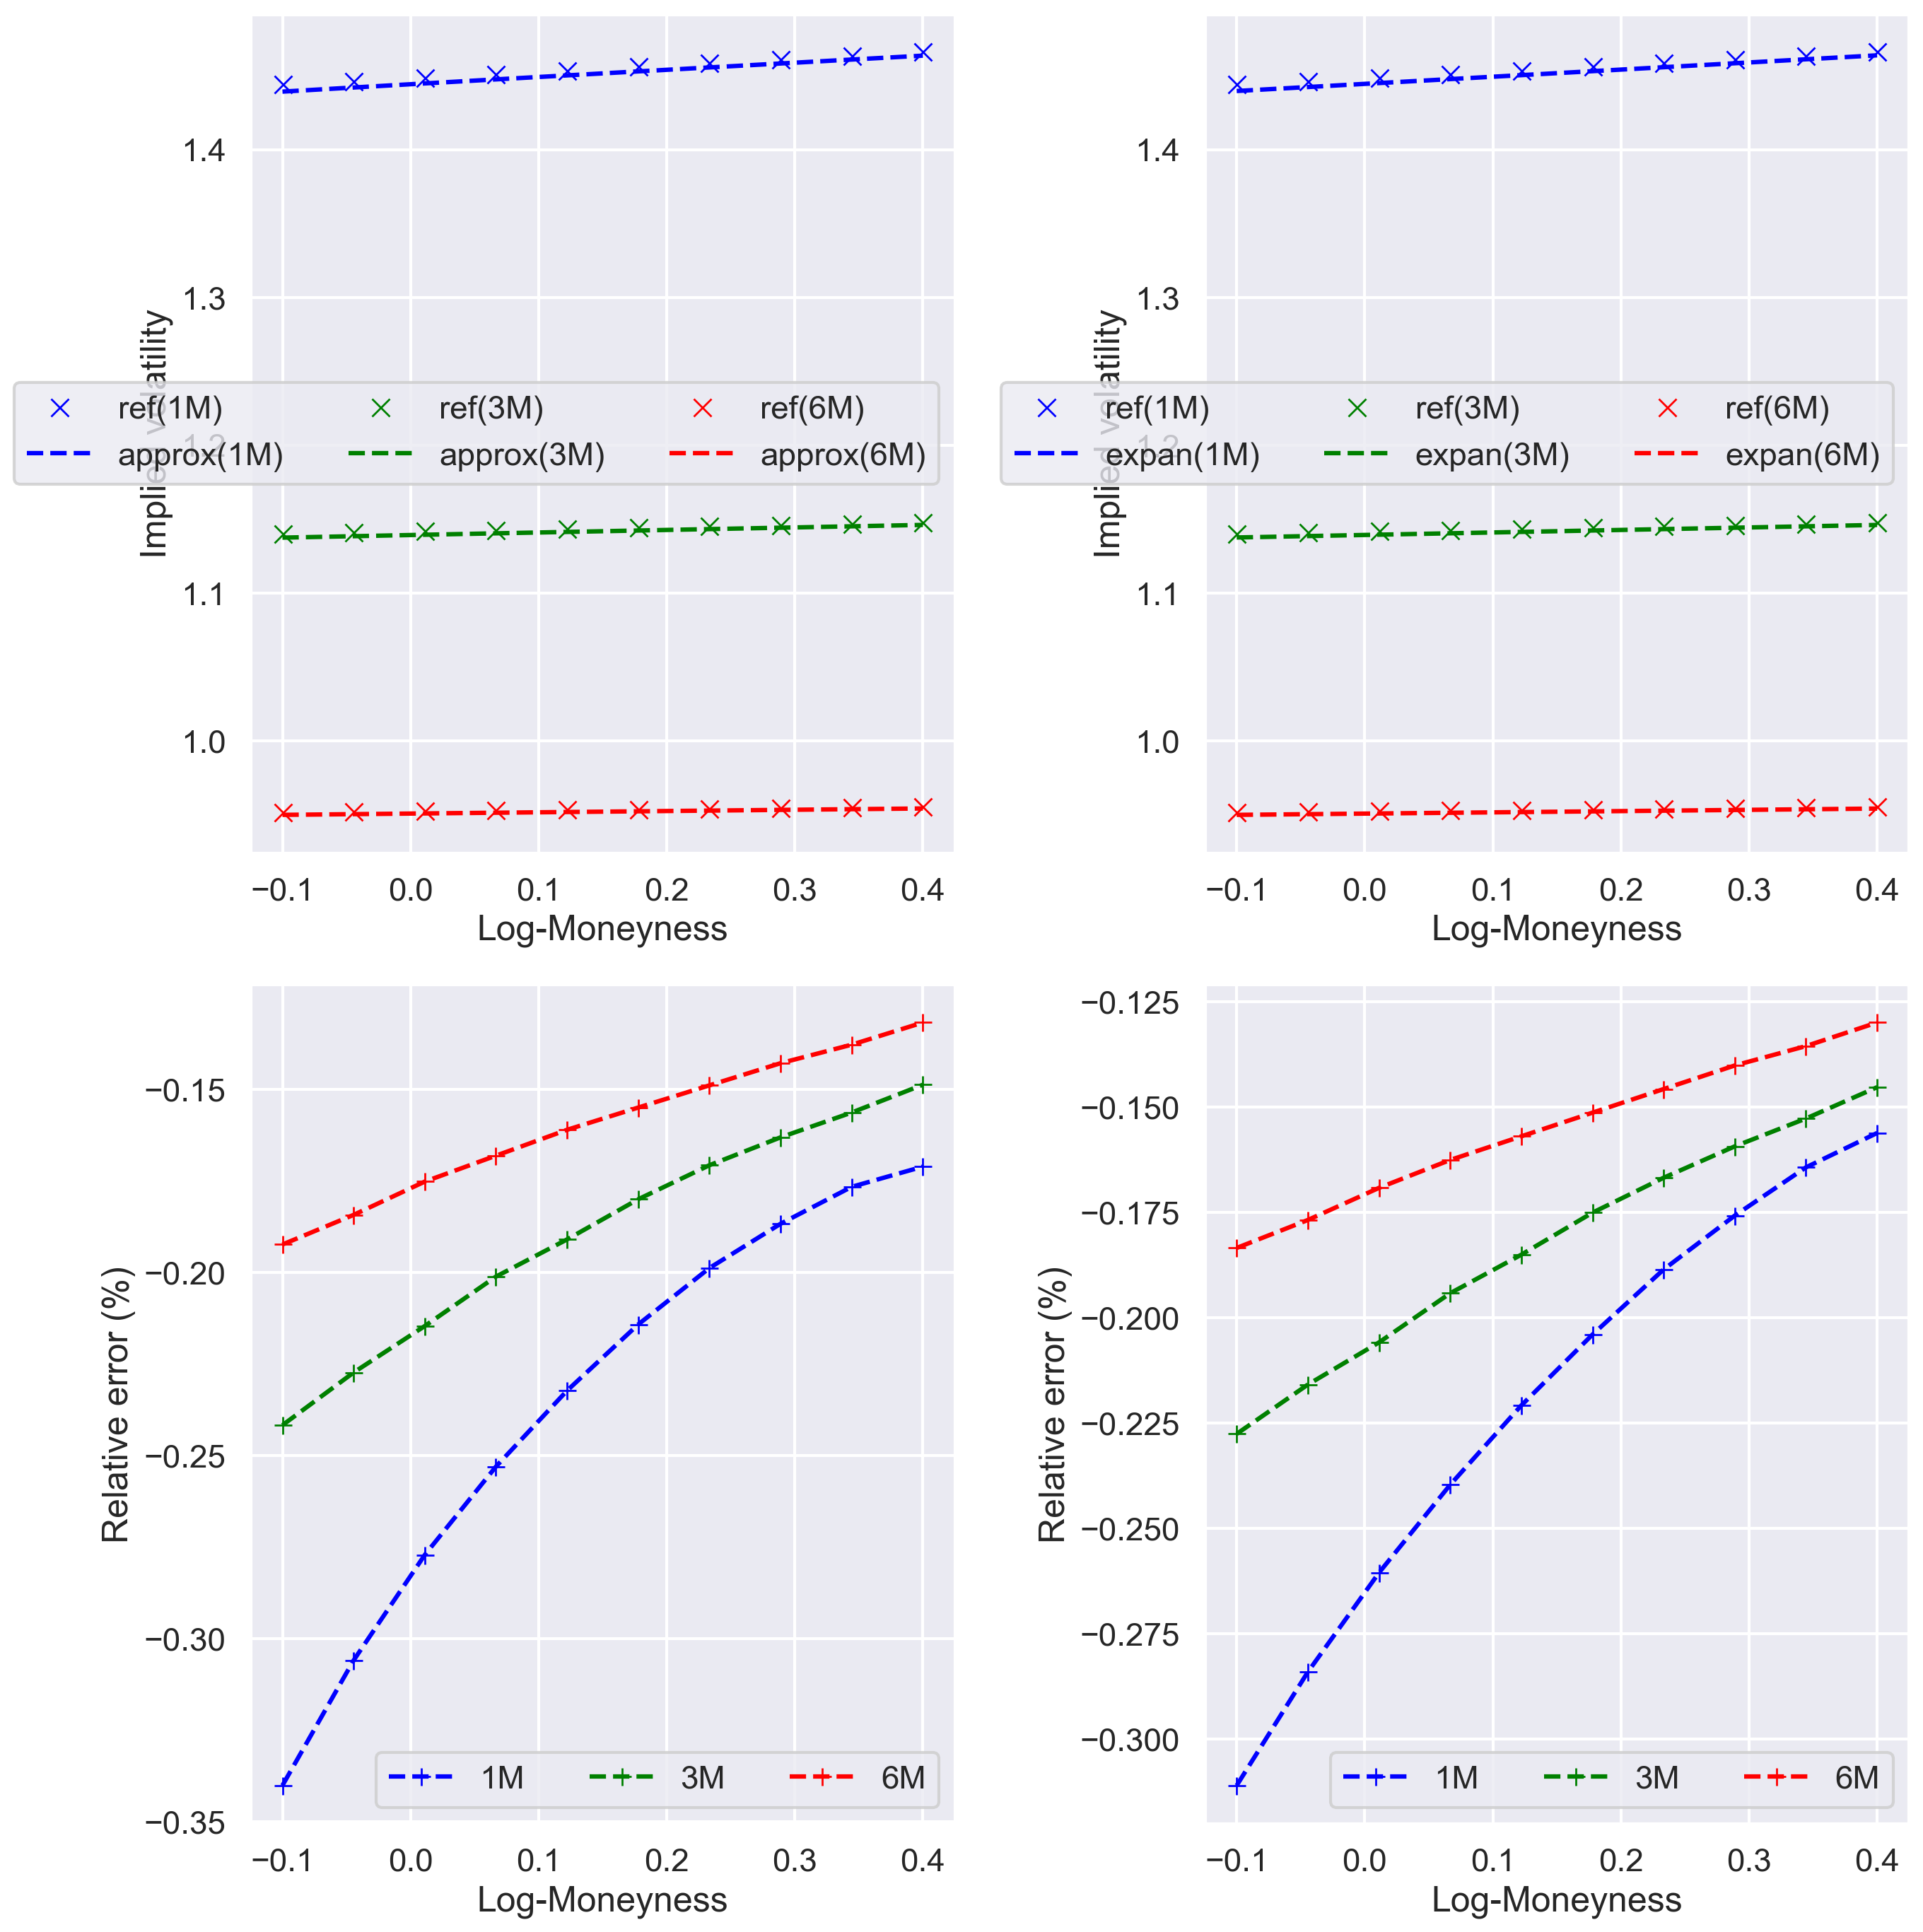

In [ ]:
iv_ref = {
    maturity: rb.vix_implied_vol(k, T, n_disc, n_mc, seed) for maturity, T in maturities.items()
}

iv_proxy = {
    maturity: rb.implied_vol_proxy(k, T) for maturity, T in maturities.items()
}

iv_expan = {
    maturity: rb.implied_vol_expan(k, T) for maturity, T in maturities.items()
}

utils.plot_style_4(k, maturities, iv_ref, iv_proxy, iv_expan, "Log-Moneyness", "Implied volatility")

#### Computation time of the explicit VIX implied volatility approximation

In [16]:
import time
k0 = 0.1
T = 3.0 / 12.0

In [17]:
start = time.perf_counter()
b.implied_vol_proxy(k0, T)
elapsed = time.perf_counter() - start
print(f"The root-finding method took {elapsed*1000:.6f} ms.")

start = time.perf_counter()
b.implied_vol_expan(k0, T)
elapsed = time.perf_counter() - start
print(f"The closed-form formula took {elapsed*1000:.6f} ms.")

The root-finding method took 2.150100 ms.
The closed-form formula took 0.080200 ms.


In [18]:
start = time.perf_counter()
rb.implied_vol_proxy(k0, T)
elapsed = time.perf_counter() - start
print(f"The root-finding method took {elapsed*1000:.6f} ms.")

start = time.perf_counter()
b.implied_vol_expan(k0, T)
elapsed = time.perf_counter() - start
print(f"The closed-form formula took {elapsed*1000:.6f} ms.")

The root-finding method took 815.333100 ms.
The closed-form formula took 0.078900 ms.


### 2. Mixed exponential forward variance models

In the mixed exponential forward variance models, the VIX option price can be approximated using the following formula
\begin{align}
\mathbb{E} \left[ \varphi \left(\text{VIX}_T^2\right) \right] = \mathbb{E} \left[ \varphi \left(\text{VIX}_{T,P}^2\right) \right] + \sum_{i=1}^3 \sum_{j=1}^2 \gamma_{i,j} P_{i.j} + \mathcal{E}_\varphi,
\end{align}
where $\mathcal{E}_\varphi$ is an error term and the cofficients $(\gamma_{i,j})_{i=\{1,2,3\}, j = \{1,2\}}$ are deterministic depending on the kernel defined in the instantaneous forward variance process. There exists no closed-form formulas for correction terms, even under the flat initial forward variance curve assumption. We expand this formula using the probabilist's Hermite polynomial.
1. VIX call option
\begin{align*}
\bar{P}_N^\text{Call} &:= c_0 \bar{I}_N (B) + c_1 \bar{I}_{1,N} (B) + c_2 \bar{I}_{2,N} (B) + c_3 \bar{I}_{3,N} (B) - \kappa \Phi(-A),
\end{align*}
where the coefficients $(c_i)_{i = 0, 1, 2, 3}$ are given by
\begin{align*}
c_0 &:= \left(1 + \frac{1}{2} \gamma_{1,2} + \frac{1}{4} \gamma_{2,2} + \frac{1}{8} \gamma_{3,2} \right) a\\
c_1 &:= \left(\gamma_{1,1} - \gamma_{1,2} + \gamma_{2,1} \frac{\sigma_{P,2}}{2 \sigma_{P,1}} - \gamma_{2,2} \left(1 - \frac{\sigma_{P,1}}{2 \sigma_{P,2}} \right) + \gamma_{3,1} \frac{\sigma_{P,2}^2}{4 \sigma_{P,1}^2} - \gamma_{3,2} \left(\frac{3}{4} - \frac{\sigma_{P,1}}{2 \sigma_{P,2}}\right) \right) a,\\
c_2 &:= \left(\gamma_{2,1} \left(1 - \frac{\sigma_{P,2}}{\sigma_{P,1}} \right) + \gamma_{2,2} \left(1 -  \frac{\sigma_{P,1}}{\sigma_{P,2}}\right) + \gamma_{3,1} \left( \frac{\sigma_{P,2}}{\sigma_{P,1}} - \frac{\sigma_{P,2}^2}{\sigma_{P,1}^2} \right) + \gamma_{3,2} \left( \frac{3}{2} - \frac{2 \sigma_{P,1}}{\sigma_{P,2}} + \frac{\sigma_{P,1}^2}{2\sigma_{P,2}^2} \right) \right) a\\
c_3 &:= \left(\gamma_{3,1} \left(1 - \frac{2 \sigma_{P,2}}{\sigma_{P,1}} + \frac{\sigma_{P,2}^2}{\sigma_{P,1}^2} \right) - \gamma_{3,2} \left(1 - \frac{2 \sigma_{P,1}}{\sigma_{P,2}} + \frac{\sigma_{P,1}^2}{\sigma_{P,2}^2} \right)\right) a,
\end{align*}
and the partial derivatives of $\bar{I}_N (B)$ with respect to $\mu_{P,1}$ are derived as follows
\begin{align*}
\bar{I}_{1,N} (B) &:= \partial_{\mu_{P,1}} \omega_0 \Phi(-B) + \sum_{n=1}^N \partial_{\mu_{P,1}} \omega_n \text{He}_{n-1} (B) \phi (B),\\
\bar{I}_{2,N} (B) &:= \partial_{\mu_{P,1}}^2 \omega_0 \Phi(-B) + \sum_{n=1}^N \partial_{\mu_{P,1}}^2 \omega_n \text{He}_{n-1} (B) \phi (B),\\
\bar{I}_{3,N} (B) &:= \partial_{\mu_{P,1}}^3 \omega_0 \Phi(-B) + \sum_{n=1}^N \partial_{\mu_{P,1}}^3 \omega_n \text{He}_{n-1} (B) \phi (B).
\end{align*}
2. VIX futures
\begin{align*}
P^F = c_0 \omega_0 + c_1 \partial_{\mu_{P,1}} \omega_0 + c_2 \partial_{\mu_{P,1}}^2 \omega_0 + c_3 \partial_{\mu_{P,1}}^3 \omega_0.
\end{align*}
Correspondingly, the VIX implied volatility can be approximated using the following two formulas
\begin{align*}
\bar{\sigma}_I = \frac{1}{2} \widetilde{\sigma} + \frac{1}{e^{\hat{x}} \sqrt{T}} \sum_{n=1}^N \left(c_0 \omega_n + c_1 \partial_{\mu_{P,1}} \omega_n + c_2 \partial_{\mu_{P,1}}^2 \omega_n + c_3 \partial_{\mu_{P,1}}^3 \omega_n \right) \text{He}_{n-1} (B) + \mathcal{E}_I,
\begin{align*}
or
\begin{align*}
\bar{\sigma}_I = \frac{1}{2} \widetilde{\sigma} + \frac{1}{P^F \sqrt{T}} \sum_{n=1}^N \left(c_0 \omega_n + c_1 \partial_{\mu_{P,1}} \omega_n + c_2 \partial_{\mu_{P,1}}^2 \omega_n + c_3 \partial_{\mu_{P,1}}^3 \omega_n \right) \text{He}_{n-1} (B) + \mathcal{E}_I.
\end{align*}


In [3]:
from mixed_bergomi import MixedStandardBergomi, MixedRoughBergomi
import hermite_expansion

In [4]:
params_mb = {
    "omega": [10, 2],
    "k": 1,
    "xi0": 0.2**2,
    "lbd": 0.2
}

params_mrb = {
    "eta": [1.4, 0.7],
    "H": 0.1,
    "xi0": 0.235**2,
    "lbd": 0.3
}

n_time = 80
n_space = 80

n_gauss = 80

n_disc = 300
n_mc = 10**6

n_max = 20

mb = MixedStandardBergomi(**params_mb)
mrb = MixedRoughBergomi(**params_mrb)

#### VIX call option price wrt the strike price in the mixed standard Bergomi model

In [5]:
kappa = np.linspace(0.1, 0.4, 10)

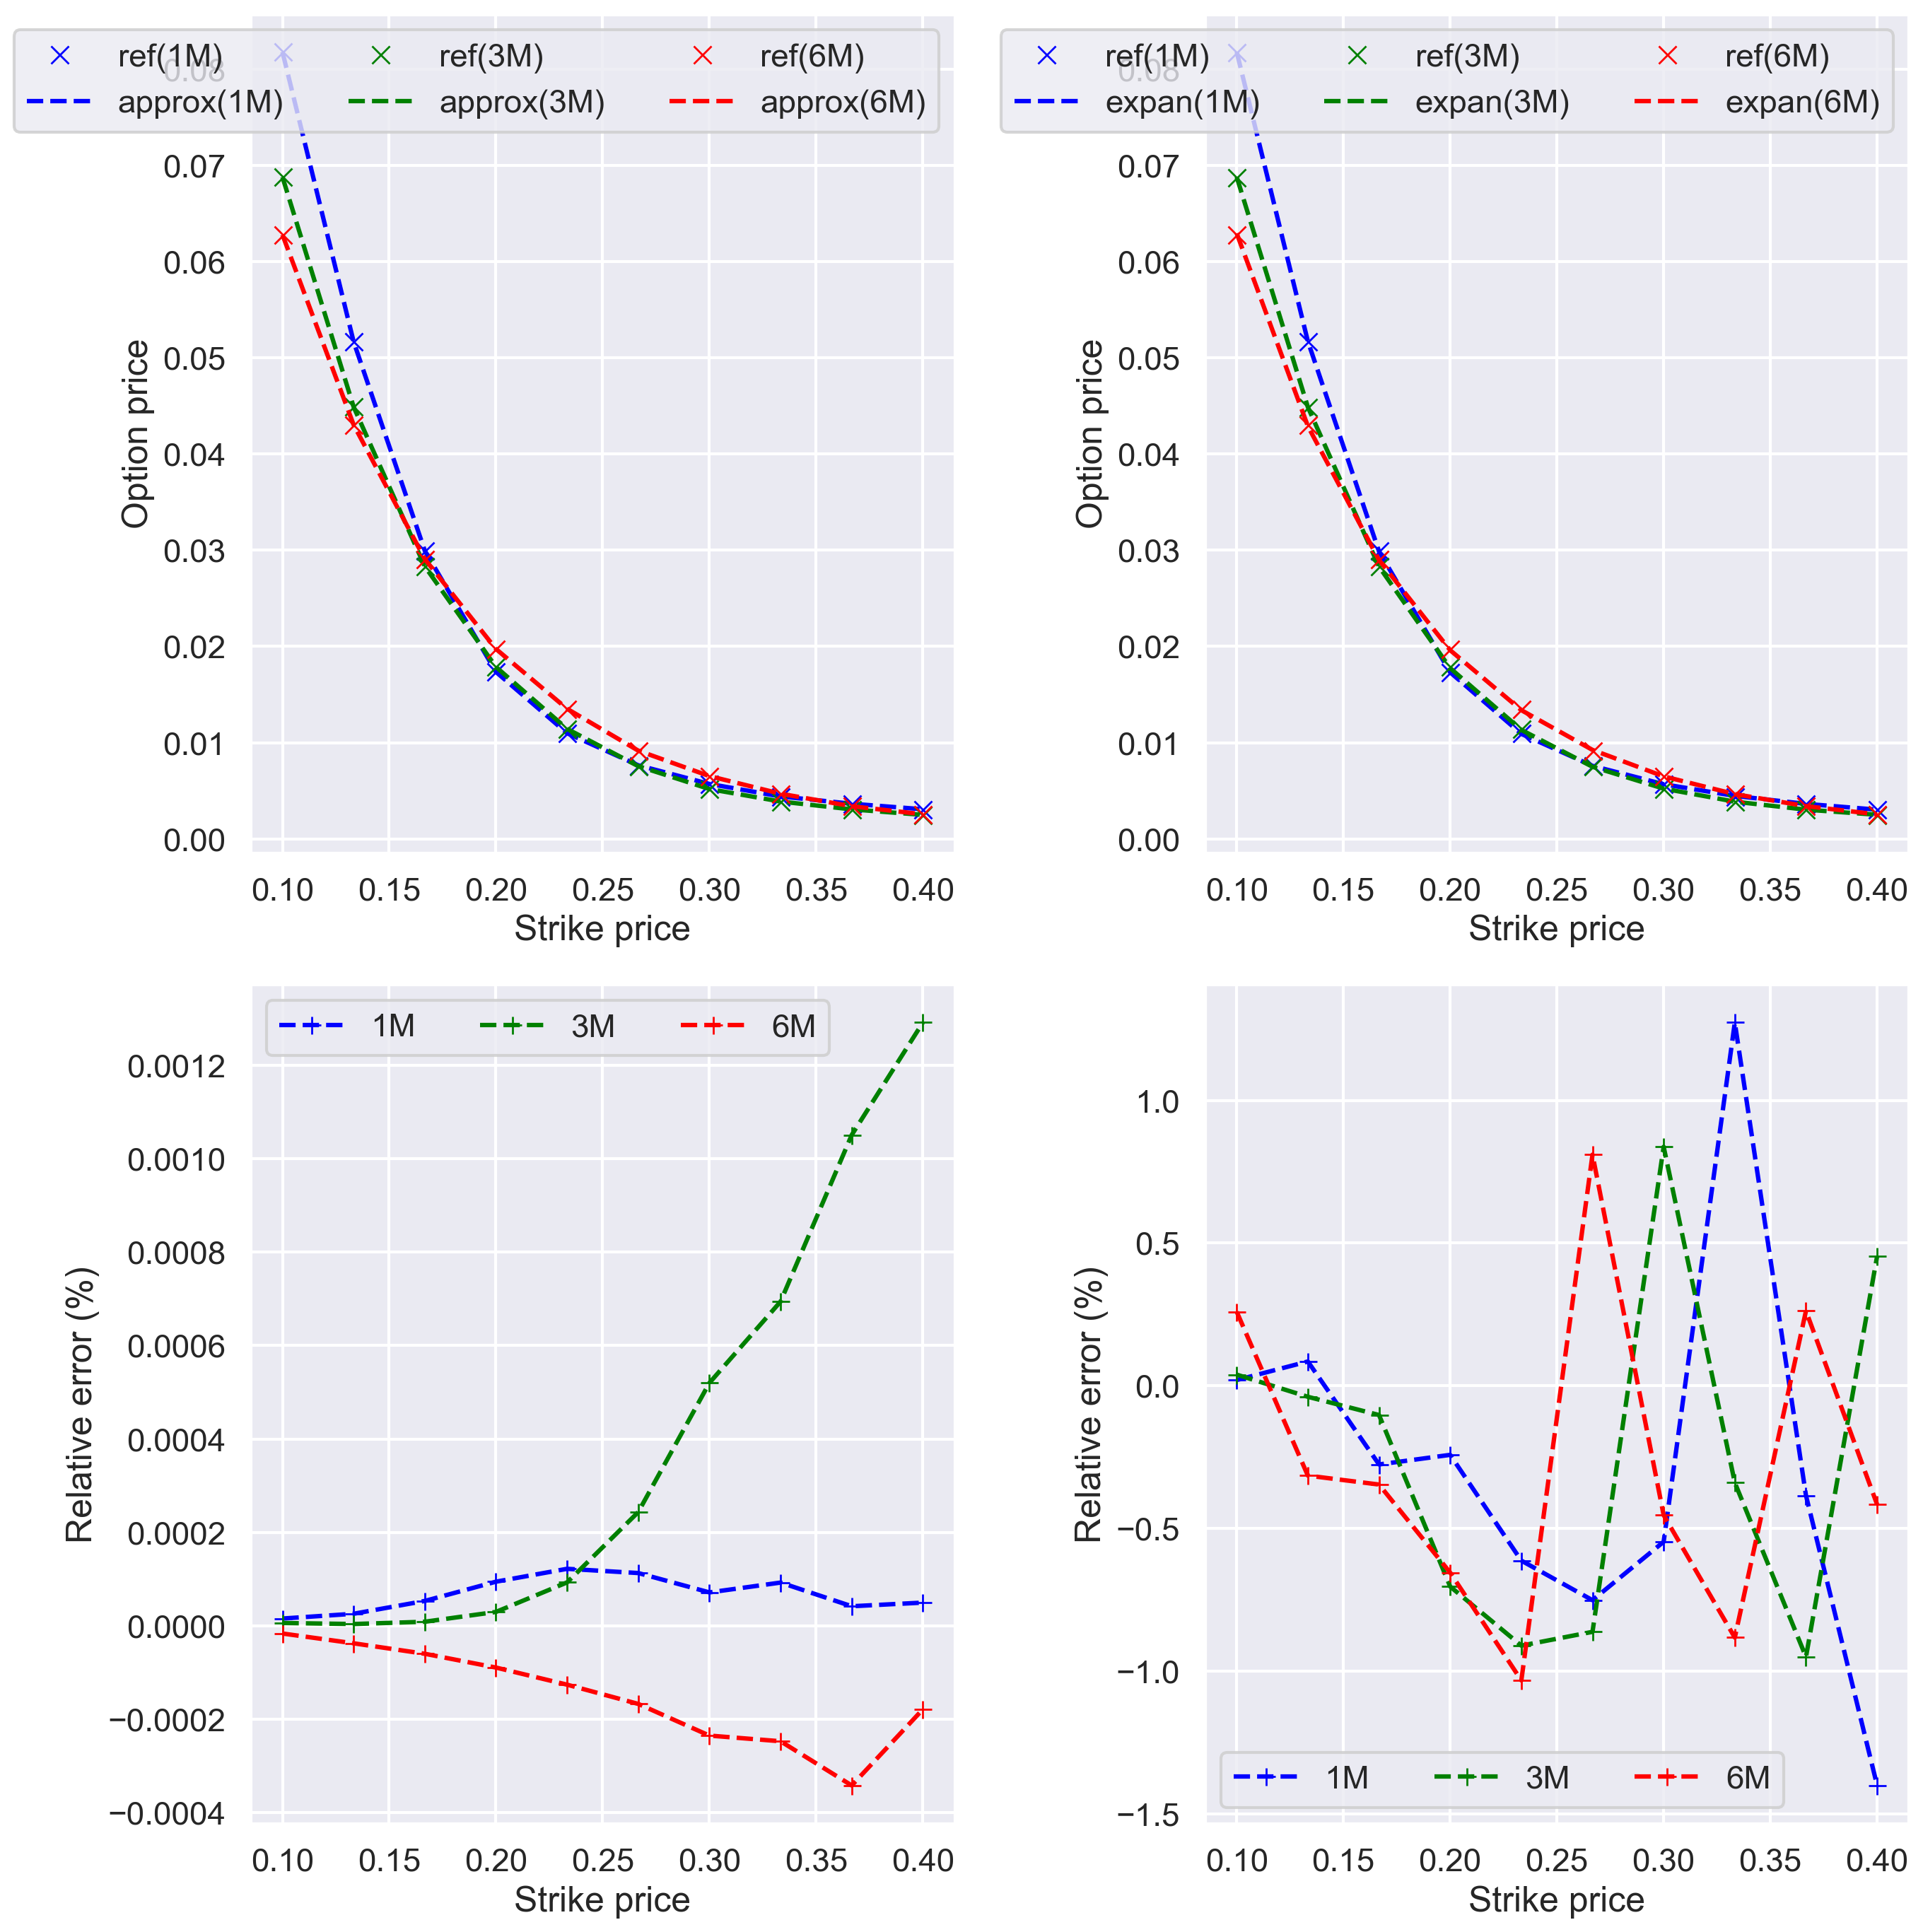

In [11]:
price_ref = {
    maturity: mb.vix_price(kappa, T, opttype=1, n_time=n_time, n_space=n_space) for maturity, T in maturities.items()
}

price_proxy = {
    maturity: mb.vix_price_proxy(kappa, T, opttype=1, n_gauss=n_gauss) for maturity, T in maturities.items()
}

price_expan = {}

for maturity, T in maturities.items():

    expan_inst = hermite_expansion.HermiteExpansion(mb, T, rule=-1)
    prices_for_this_maturity = []
    
    for k in kappa:
        price = expan_inst.vix_option_price_expan(
            k,
            opttype=1, 
            n_max=n_max, 
            n_mc=n_mc
        )
        prices_for_this_maturity.append(price)
    
    price_expan[maturity] = np.array(prices_for_this_maturity)

utils.plot_style_4(kappa, maturities, price_ref, price_proxy, price_expan, "Strike price", "Option price")

#### VIX call option price wrt the strike price in the mixed rough Bergomi model

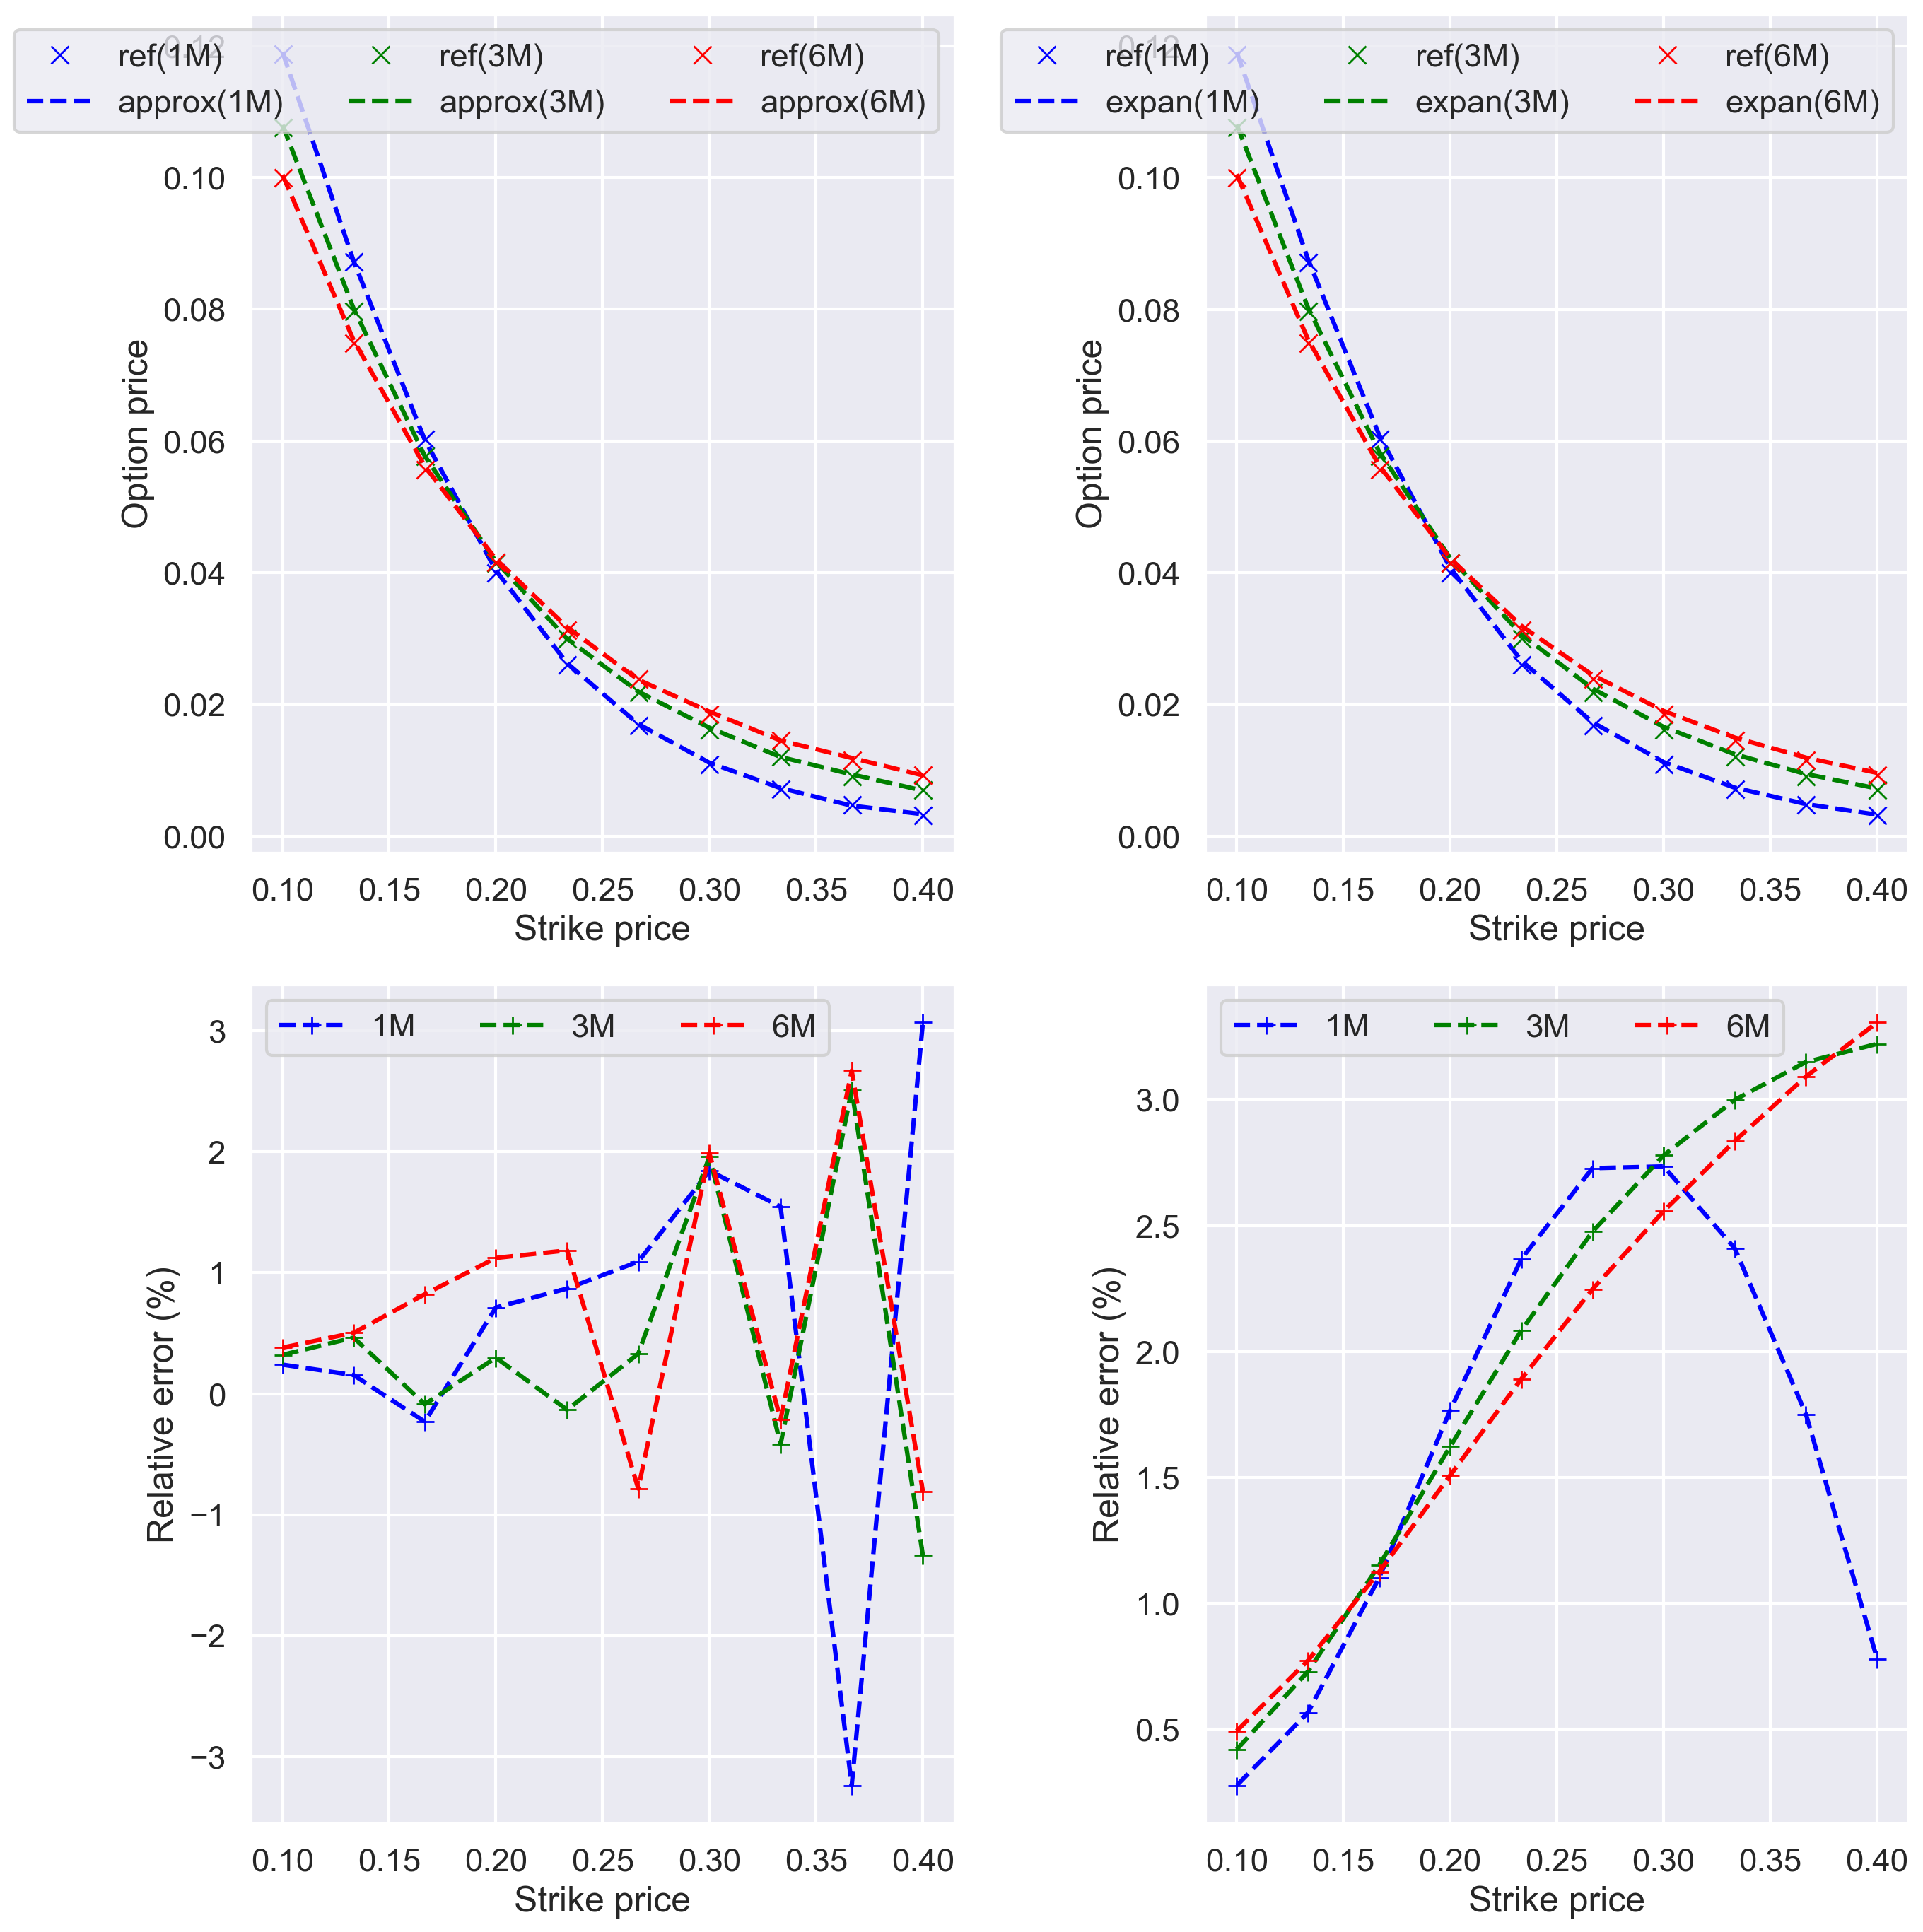

In [21]:
price_ref = {
    maturity: mrb.vix_price(kappa, T, opttype=1, n_disc=n_disc, n_mc=n_mc, seed=seed) for maturity, T in maturities.items()
}

price_proxy = {
    maturity: mrb.vix_price_proxy(kappa, T, opttype=1, n_gauss=n_gauss) for maturity, T in maturities.items()
}

price_expan = {}

for maturity, T in maturities.items():

    expan_inst = hermite_expansion.HermiteExpansion(mrb, T, rule=-1)
    prices_for_this_maturity = []
    
    for k in kappa:
        price = expan_inst.vix_option_price_expan(
            k,
            opttype=1, 
            n_max=n_max, 
            n_mc=n_mc
        )
        prices_for_this_maturity.append(price)
    
    price_expan[maturity] = np.array(prices_for_this_maturity)

utils.plot_style_4(kappa, maturities, price_ref, price_proxy, price_expan, "Strike price", "Option price")

#### VIX implied volatility wrt the log-moneyness $k = \log (\kappa/ F)$ in the mixed standard Bergomi model

In [13]:
k = np.linspace(-0.1, 0.4, 10)

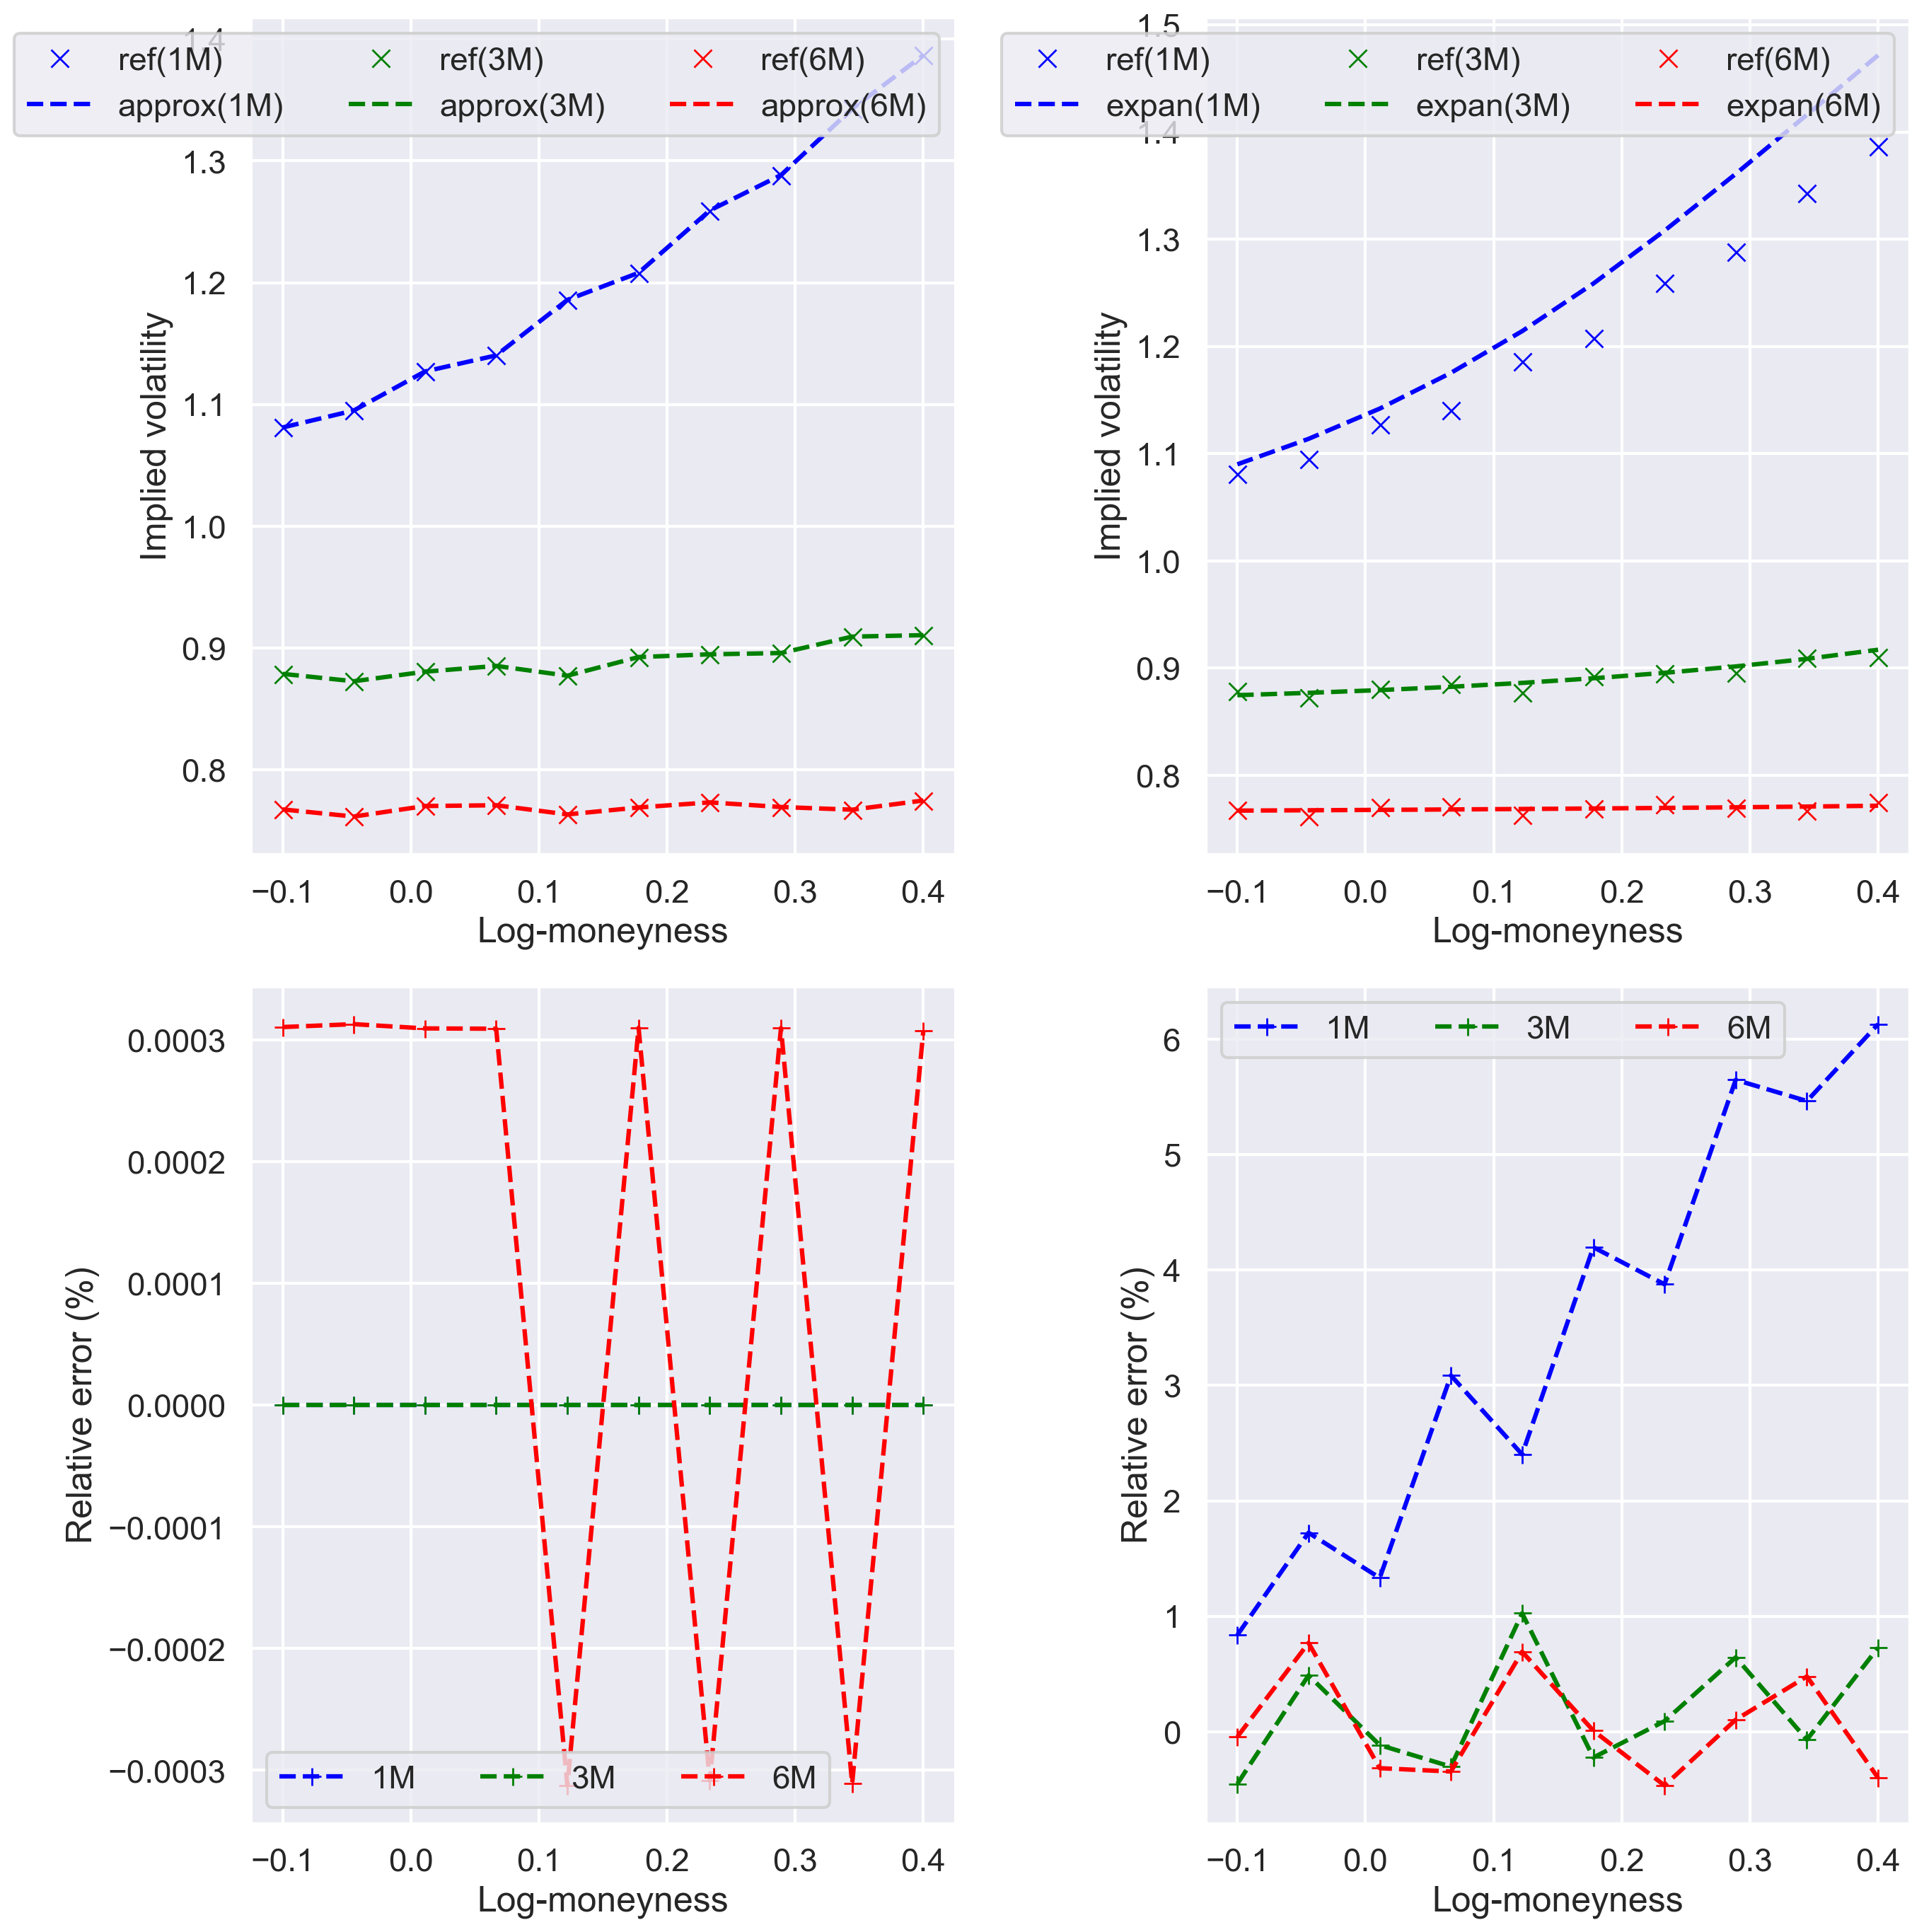

In [14]:
iv_ref = {
    maturity: mb.vix_implied_vol(k, T, n_time, n_space) for maturity, T in maturities.items()
}

iv_proxy = {
    maturity: mb.implied_vol_proxy(k, T, n_gauss) for maturity, T in maturities.items()
}

iv_expan = {}

for maturity, T in maturities.items():

    expan_inst = hermite_expansion.HermiteExpansion(mb, T, rule=-1)
    ivs_for_this_maturity = []
    
    for k_i in k:
        iv = expan_inst.implied_vol_expan(
            k_i,
            n_max=n_max, 
            n_mc=n_mc,
            method=1
        )[0]
        ivs_for_this_maturity.append(iv)
    
    iv_expan[maturity] = np.array(ivs_for_this_maturity)

utils.plot_style_4(k, maturities, iv_ref, iv_proxy, iv_expan, "Log-moneyness", "Implied volatility")

#### VIX implied volatility wrt the log-moneyness $k = \log (\kappa/ F)$ in the mixed rough Bergomi model

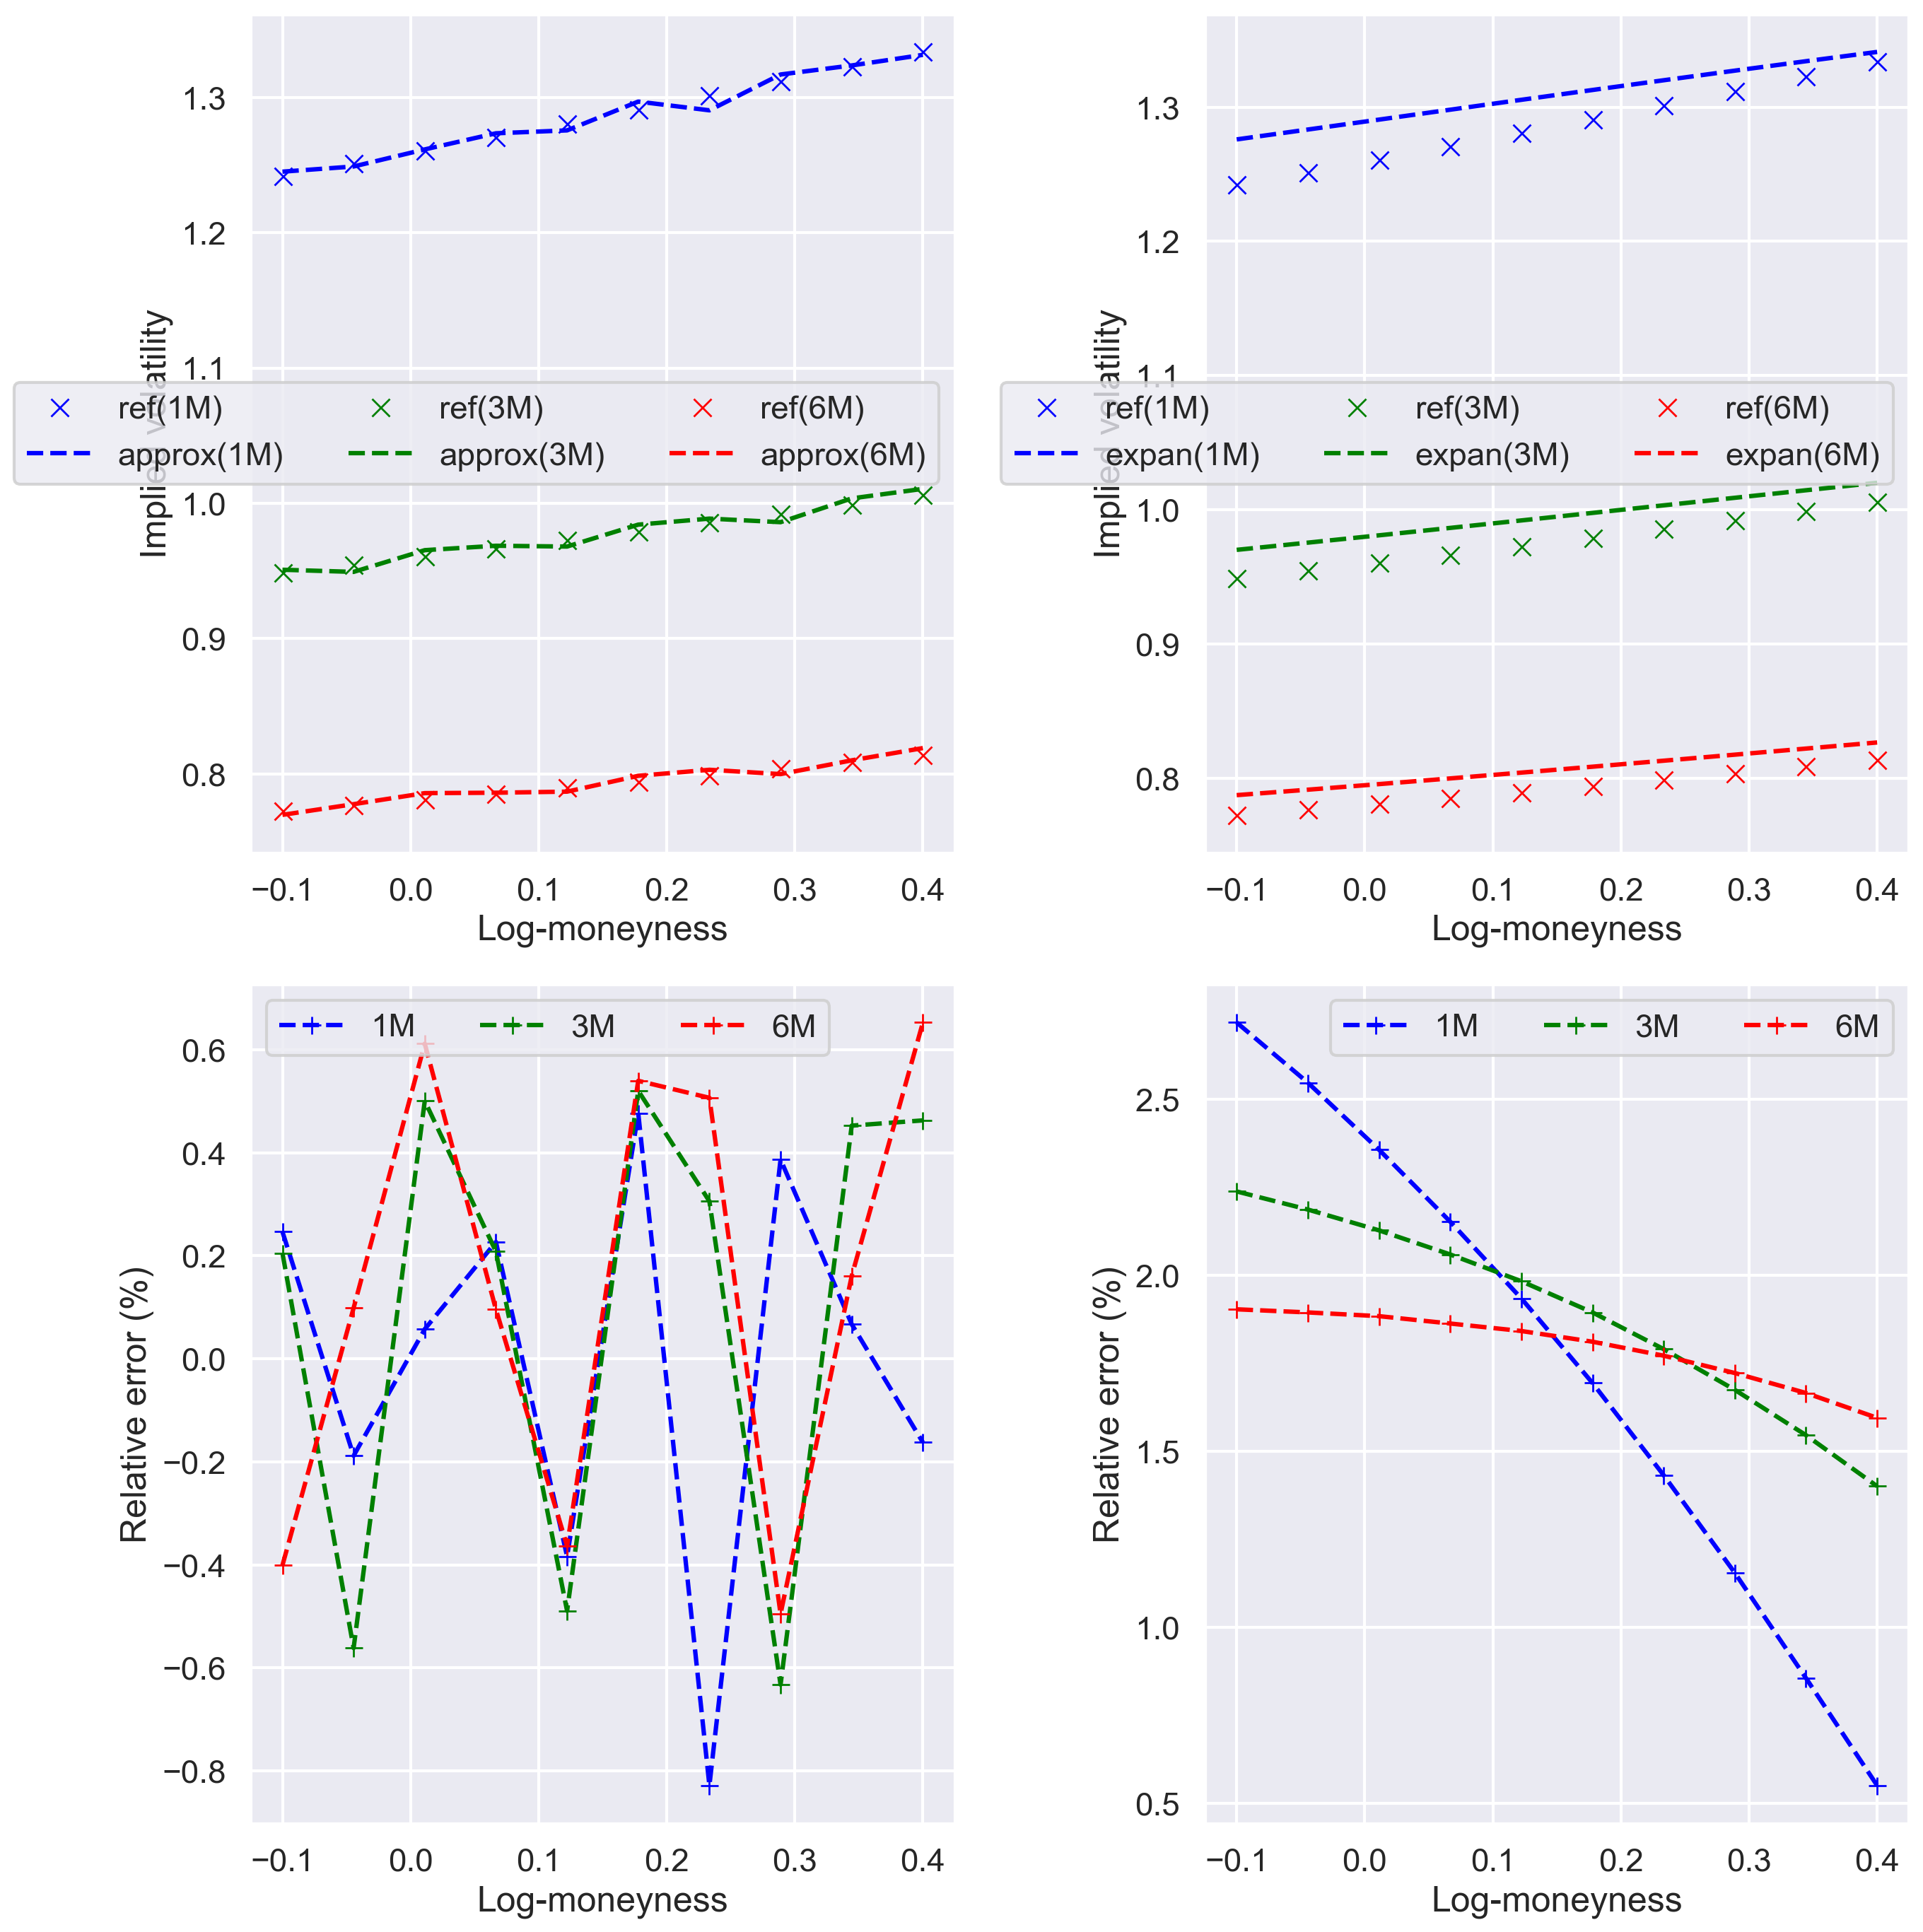

In [15]:
iv_ref = {
    maturity: mrb.vix_implied_vol(k, T, n_disc, n_mc, seed) for maturity, T in maturities.items()
}

iv_proxy = {
    maturity: mrb.implied_vol_proxy(k, T, n_gauss) for maturity, T in maturities.items()
}

iv_expan = {}

for maturity, T in maturities.items():

    expan_inst = hermite_expansion.HermiteExpansion(mrb, T, rule=-1)
    ivs_for_this_maturity = []
    
    for k_i in k:
        iv = expan_inst.implied_vol_expan(
            k_i,
            n_max=n_max, 
            n_mc=n_mc,
            method=1
        )[0]
        ivs_for_this_maturity.append(iv)
    
    iv_expan[maturity] = np.array(ivs_for_this_maturity)

utils.plot_style_4(k, maturities, iv_ref, iv_proxy, iv_expan, "Log-moneyness", "Implied volatility")

#### Computation time of the explicit VIX implied volatility approximation

In [ ]:
import time
k0 = 0.1
T = 3.0 / 12.0

In [22]:
start = time.perf_counter()
mb.implied_vol_proxy(k0, T, n_gauss)
elapsed = time.perf_counter() - start
print(f"The root-finding method took {elapsed*1000:.6f} ms.")

expan_inst = hermite_expansion.HermiteExpansion(mb, T, rule=-1)
start = time.perf_counter()
expan_inst.implied_vol_expan(k0, n_max, n_mc=n_mc, method=1)[0]
elapsed = time.perf_counter() - start
print(f"The closed-form formula took {elapsed*1000:.6f} ms.")

The root-finding method took 3.583200 ms.
The closed-form formula took 3618.982200 ms.


In [23]:
start = time.perf_counter()
mrb.implied_vol_proxy(k0, T, n_gauss)
elapsed = time.perf_counter() - start
print(f"The root-finding method took {elapsed*1000:.6f} ms.")

expan_inst = hermite_expansion.HermiteExpansion(mrb, T, rule=-1)
start = time.perf_counter()
expan_inst.implied_vol_expan(k0, n_max, n_mc=n_mc, method=1)[0]
elapsed = time.perf_counter() - start
print(f"The closed-form formula took {elapsed*1000:.6f} ms.")

The root-finding method took 1610.464300 ms.
The closed-form formula took 2767.414400 ms.


If the optimal order is fixed to 10, which means that we don't need to find the optimal order of the hermite expansion, the computaion time is shorter.

In [24]:
expan_inst = hermite_expansion.HermiteExpansion(mrb, T, rule=-1)
start = time.perf_counter()
expan_inst.implied_vol_expan_fixed(k0, method=1)
elapsed = time.perf_counter() - start
print(f"The closed-form formula took {elapsed*1000:.6f} ms.")

The closed-form formula took 882.526100 ms.
